In [1]:
import os 
import pandas as pd
import numpy as np 
%matplotlib inline

In [2]:
# Define data directory 
data_dir = "C:\\Users\\sarsadanand\\Desktop\\L&D\\ML\\ML_Ensemble_Model_Bagging_RandomForest"

In [3]:
# Switching to the data directory 
os.chdir(data_dir)

In [4]:
# Read the data 
hr_data = pd.read_csv("hr.csv")

In [5]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# Unique value in the left column
hr_data.left.nunique() # 2 unique values in this column

2

In [7]:
# Check freq distribution for left column
hr_data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [8]:
hr_data.shape

(14999, 10)

In [9]:
# Missing values in all the columns 
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [10]:
hr_data.dtypes # To check the datatypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [11]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
# Unique value counts in salary column
hr_data.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [13]:
# Unique value counts in sales column
hr_data.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [14]:
# Change the column name from sales to dept 
hr_data.rename(columns={'sales': 'department'}, inplace=True)

In [15]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
# Create the feature set (X)
X = hr_data.drop('left', axis =1) # Dropping left column and creating X feature set

In [17]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [18]:
# Let's create the "y" dataset 
y = hr_data['left']

In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [20]:
type(y)  # A dataframe with one column 

pandas.core.series.Series

sales                     object
salary                    object
From df.dtypes we can see that these are the two object type columns which need to be converted to their respective dummy variables

In [21]:
# Translate the two categorical columns in their dummy representation 
X = pd.get_dummies(X)  # Will pick all the columns with type object and create dummies 

In [22]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [23]:
# Train and test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=400)

In [24]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14999, 20)
(14999,)
(11999, 20)
(11999,)
(3000, 20)
(3000,)


In [25]:
# Let's build the first ensemble model 
from sklearn.ensemble import BaggingClassifier  # What type of ensemble you want to create 
from sklearn.tree import DecisionTreeClassifier # This will be the base learner 

In [26]:
# Initialize the ensemble model 
clf = BaggingClassifier(oob_score=True, n_estimators=25, random_state=300, 
                        base_estimator=DecisionTreeClassifier())

# We are going to create 25 classification decision tree in this ensemble. 
# oob_score (out of bage score) = performance of respective tree on the out-of-sample data (validation/test data)

In [27]:
# Let's try to put training data in the skeleton defined 
clf.fit(X_train, y_train)

C:\Users\sarsadanand\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\sarsadanand\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=25,
                  oob_score=True, random_state=300)

In [28]:
clf.oob_score_  
# OOB accuracy - Average accuracy on all the out-of-sample data. or avg accuracy on 25 validation datasets( one for each tree)
# training accuracy of ensemble with 25 decision trees. 

0.988665722143512

In [29]:
# How to actually check the accuracy of ensemble create above. 
clf.score(X_test, y_test)

0.9876666666666667

In [30]:
# Trying to find out the best number of trees/estimators/base learner for the bagging model
clf = BaggingClassifier(oob_score=True, n_estimators=10, random_state=300, 
                        base_estimator=DecisionTreeClassifier())
clf.fit(X_train, y_train)
oob = clf.oob_score_  
# print(" the number of estimators = ",)
print("Out of bage score is", str(oob))

Out of bage score is 0.9823318609884157


C:\Users\sarsadanand\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\sarsadanand\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [31]:
# Trying to find out the best number of trees/estimators/base learner for the bagging model
clf = BaggingClassifier(oob_score=True, n_estimators=20, random_state=300, 
                        base_estimator=DecisionTreeClassifier())
clf.fit(X_train, y_train)
oob = clf.oob_score_  
# print(" the number of estimators = ",)
print("Out of bage score is", str(oob))

Out of bage score is 0.9878323193599466


C:\Users\sarsadanand\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\sarsadanand\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [32]:
# Trying to find out the best number of trees/estimators/base learner for the bagging model
clf = BaggingClassifier(oob_score=True, n_estimators=300, random_state=300, 
                        base_estimator=DecisionTreeClassifier())
clf.fit(X_train, y_train)
oob = clf.oob_score_  
# print(" the number of estimators = ",)
print("Out of bage score is", str(oob))

Out of bage score is 0.9902491874322861


In [33]:
for i in range(10,300,20):  # Try 10, 30,50, 70, 90.... 300
    clf = BaggingClassifier(oob_score=True, n_estimators=i, random_state=300, 
                        base_estimator=DecisionTreeClassifier())
    clf.fit(X_train, y_train)
    oob = clf.oob_score_  
    print(" the number of estimators = ", str(i))
    print("Out of bage score is", str(oob))
    print("----------------------------------")
    

C:\Users\sarsadanand\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\sarsadanand\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


 the number of estimators =  10
Out of bage score is 0.9823318609884157
----------------------------------
 the number of estimators =  30
Out of bage score is 0.9891657638136512
----------------------------------
 the number of estimators =  50
Out of bage score is 0.9894991249270773
----------------------------------
 the number of estimators =  70
Out of bage score is 0.9895824652054338
----------------------------------
 the number of estimators =  90
Out of bage score is 0.9898324860405033
----------------------------------
 the number of estimators =  110
Out of bage score is 0.9901658471539295
----------------------------------
 the number of estimators =  130
Out of bage score is 0.9902491874322861
----------------------------------
 the number of estimators =  150
Out of bage score is 0.9904992082673556
----------------------------------
 the number of estimators =  170
Out of bage score is 0.9906658888240687
----------------------------------
 the number of estimators =  190


In [34]:
# Let's build the ensemble with 190 estimators
clf = BaggingClassifier(oob_score=True, n_estimators=190, random_state=300, 
                        base_estimator=DecisionTreeClassifier())

In [35]:
B1 = clf.fit(X_train, y_train)

In [36]:
B1.predict(X_test)  # Predicted values on test dataset from best ensemble 

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [37]:
# Create confusion matrix out of this
import sklearn.metrics as metrics
metrics.confusion_matrix(y_test, B1.predict(X_test))

array([[2259,   12],
       [  23,  706]], dtype=int64)

In [38]:
# I would be more confident in using 10s of such testing dataset and seeing the same accuracy across. 

In [39]:
# Display feature importance. 
clf.estimators_

type(clf.estimators_)

list

In [40]:
clf.estimators_ # these are the 190 trees used, clf.estimators_[0] will give the first decission tree

[DecisionTreeClassifier(random_state=1640270127),
 DecisionTreeClassifier(random_state=1306260884),
 DecisionTreeClassifier(random_state=1255539751),
 DecisionTreeClassifier(random_state=934107047),
 DecisionTreeClassifier(random_state=1431551598),
 DecisionTreeClassifier(random_state=2146597940),
 DecisionTreeClassifier(random_state=522685486),
 DecisionTreeClassifier(random_state=753086597),
 DecisionTreeClassifier(random_state=304996901),
 DecisionTreeClassifier(random_state=125388421),
 DecisionTreeClassifier(random_state=225777655),
 DecisionTreeClassifier(random_state=911702132),
 DecisionTreeClassifier(random_state=1705271475),
 DecisionTreeClassifier(random_state=1855212142),
 DecisionTreeClassifier(random_state=1927410252),
 DecisionTreeClassifier(random_state=1792206370),
 DecisionTreeClassifier(random_state=2002259727),
 DecisionTreeClassifier(random_state=904180025),
 DecisionTreeClassifier(random_state=1277803413),
 DecisionTreeClassifier(random_state=2134168355),
 Decisio

In [41]:
len(clf.estimators_)  # These are 190 trees we build 

190

In [42]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [43]:
# Look at the first tree of ensemble 
clf.estimators_[0].feature_importances_  # gives importance of all the features in first tree

array([5.28214657e-01, 1.42301857e-01, 1.04466580e-01, 7.98603725e-02,
       1.23041370e-01, 1.13842336e-03, 3.05682450e-04, 1.53054770e-03,
       2.83501511e-03, 5.94148689e-04, 2.10300304e-04, 8.85985183e-04,
       7.17214447e-04, 9.87558963e-04, 2.37285988e-03, 2.09368585e-03,
       3.50557318e-03, 7.02252796e-04, 2.26704780e-03, 1.96886745e-03])

In [44]:
# Look at the 190th tree of ensemble 
clf.estimators_[189].feature_importances_

array([4.97109574e-01, 1.11305704e-01, 1.10786674e-01, 9.80344679e-02,
       1.59656351e-01, 1.58014649e-03, 7.35782741e-04, 1.28284889e-03,
       6.46208955e-05, 3.70809339e-03, 5.15454385e-04, 4.06710941e-04,
       5.09182961e-04, 0.00000000e+00, 2.68872545e-03, 2.93089756e-03,
       2.92709769e-03, 9.36995938e-04, 2.49812403e-03, 2.32254760e-03])

In [45]:
imp = clf.estimators_[189].feature_importances_
# To print colname and feature importance
FI = pd.Series(imp, index = X.columns.tolist())
print(FI)

satisfaction_level        0.497110
last_evaluation           0.111306
number_project            0.110787
average_montly_hours      0.098034
time_spend_company        0.159656
Work_accident             0.001580
promotion_last_5years     0.000736
department_IT             0.001283
department_RandD          0.000065
department_accounting     0.003708
department_hr             0.000515
department_management     0.000407
department_marketing      0.000509
department_product_mng    0.000000
department_sales          0.002689
department_support        0.002931
department_technical      0.002927
salary_high               0.000937
salary_low                0.002498
salary_medium             0.002323
dtype: float64


In [46]:
# To find out average importance of individual feature
imp = []
for i in clf.estimators_:
    imp.append(i.feature_importances_)
    
imp = np.mean(imp, axis = 0)

In [47]:
imp

array([4.96306795e-01, 1.37711277e-01, 1.08983634e-01, 9.72832676e-02,
       1.37125060e-01, 1.74087988e-03, 1.52619635e-04, 1.41008456e-03,
       6.89547307e-04, 1.43034196e-03, 5.78418887e-04, 5.20689480e-04,
       7.71209089e-04, 6.40428556e-04, 2.77081436e-03, 2.62242138e-03,
       3.11044774e-03, 9.84399129e-04, 3.12008538e-03, 2.04757989e-03])

In [48]:
FI = pd.Series(imp, index = X.columns.tolist())
print(FI)

satisfaction_level        0.496307
last_evaluation           0.137711
number_project            0.108984
average_montly_hours      0.097283
time_spend_company        0.137125
Work_accident             0.001741
promotion_last_5years     0.000153
department_IT             0.001410
department_RandD          0.000690
department_accounting     0.001430
department_hr             0.000578
department_management     0.000521
department_marketing      0.000771
department_product_mng    0.000640
department_sales          0.002771
department_support        0.002622
department_technical      0.003110
salary_high               0.000984
salary_low                0.003120
salary_medium             0.002048
dtype: float64


Note: 
%matplotlib inline: With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

<AxesSubplot:>

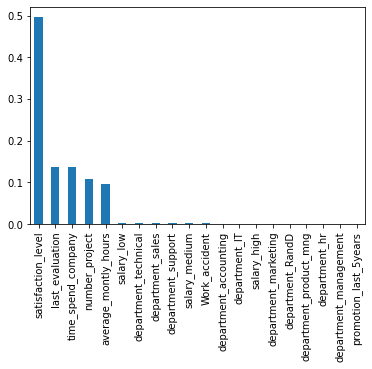

In [49]:
%matplotlib inline
FI.sort_values(ascending=False).plot(kind='bar')

- From above we can see that the maximum split out of the 190 trees is happening for satisfaction_level feature

## Random Forest Classifier for same data set

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
clf_rf = RandomForestClassifier(oob_score=True, n_estimators=50, random_state=300)

In [52]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=300)

In [53]:
clf_rf.oob_score_
# Average OOB accuracy of random forest classifier accross the 50 trees

0.9894991249270773

In [54]:
for i in range(10,500,20):  # Try 10, 30,50, 70, 90.... 300
    clf = RandomForestClassifier(oob_score=True, n_estimators=i, random_state=300)
    clf.fit(X_train, y_train)
    oob = clf.oob_score_  
    print(" the number of estimators = ", str(i))
    print("Out of bage score is", str(oob))
    print("----------------------------------")
    

C:\Users\sarsadanand\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


 the number of estimators =  10
Out of bage score is 0.9805817151429286
----------------------------------
 the number of estimators =  30
Out of bage score is 0.9894157846487207
----------------------------------
 the number of estimators =  50
Out of bage score is 0.9894991249270773
----------------------------------
 the number of estimators =  70
Out of bage score is 0.9902491874322861
----------------------------------
 the number of estimators =  90
Out of bage score is 0.9905825485457121
----------------------------------
 the number of estimators =  110
Out of bage score is 0.9904992082673556
----------------------------------
 the number of estimators =  130
Out of bage score is 0.9907492291024252
----------------------------------
 the number of estimators =  150
Out of bage score is 0.9907492291024252
----------------------------------
 the number of estimators =  170
Out of bage score is 0.9905825485457121
----------------------------------
 the number of estimators =  190


In [60]:
# we would need to keep the estimators minimal, 
# for a marginal increase in oob score it is not recommended to increase the estimators
clf = RandomForestClassifier(oob_score=True, n_estimators=90, random_state=300)
clf.fit(X_train, y_train)
oob = clf.oob_score_  
print(oob)

0.9905825485457121


In [61]:
clf.feature_importances_

array([0.32074926, 0.11871557, 0.18853896, 0.14476232, 0.18142102,
       0.00914808, 0.00179136, 0.00187148, 0.00141902, 0.00166392,
       0.00141975, 0.00173597, 0.00112938, 0.00123875, 0.00349149,
       0.00295108, 0.0036715 , 0.0047913 , 0.0060261 , 0.00346367])

In [62]:
imp = []
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp = np.mean(imp, axis = 0)

FI = pd.Series(imp, index = X.columns.tolist())
print(FI)

satisfaction_level        0.320749
last_evaluation           0.118716
number_project            0.188539
average_montly_hours      0.144762
time_spend_company        0.181421
Work_accident             0.009148
promotion_last_5years     0.001791
department_IT             0.001871
department_RandD          0.001419
department_accounting     0.001664
department_hr             0.001420
department_management     0.001736
department_marketing      0.001129
department_product_mng    0.001239
department_sales          0.003491
department_support        0.002951
department_technical      0.003671
salary_high               0.004791
salary_low                0.006026
salary_medium             0.003464
dtype: float64


<AxesSubplot:>

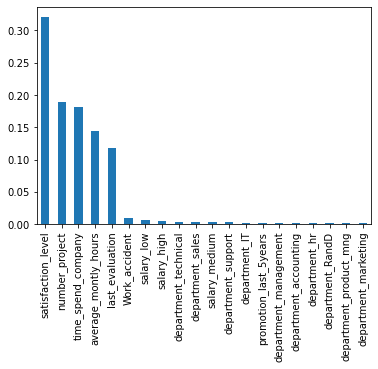

In [63]:
%matplotlib inline
FI.sort_values(ascending=False).plot(kind='bar')

In [64]:
############# End ###############